### Importing required modules

In [83]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Loading database

In [84]:
database= sqlite3.connect("inventory.db")

### Fetching vendor summary

In [85]:
df= pd.read_sql_query("""
    SELECT *
    FROM vendor_sales_summary
""", database)

In [86]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesQuantity,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPriceRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,142049.0,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,160247.0,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,187140.0,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,200412.0,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4.223108e+06,135838.0,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [87]:
df.shape

(10692, 18)

### Analyzing resultant table to gain insights into the distribution of each field to identify patterns, anomalies and data quality

#### Summary Statistics

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


In [89]:
df.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                   float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesDollars        float64
TotalSalesQuantity       float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
GrossProfit              float64
ProfitMargin             float64
StockTurnover            float64
SalesToPriceRatio        float64
dtype: object

#### Histogram plots for identifying numerical field distribution

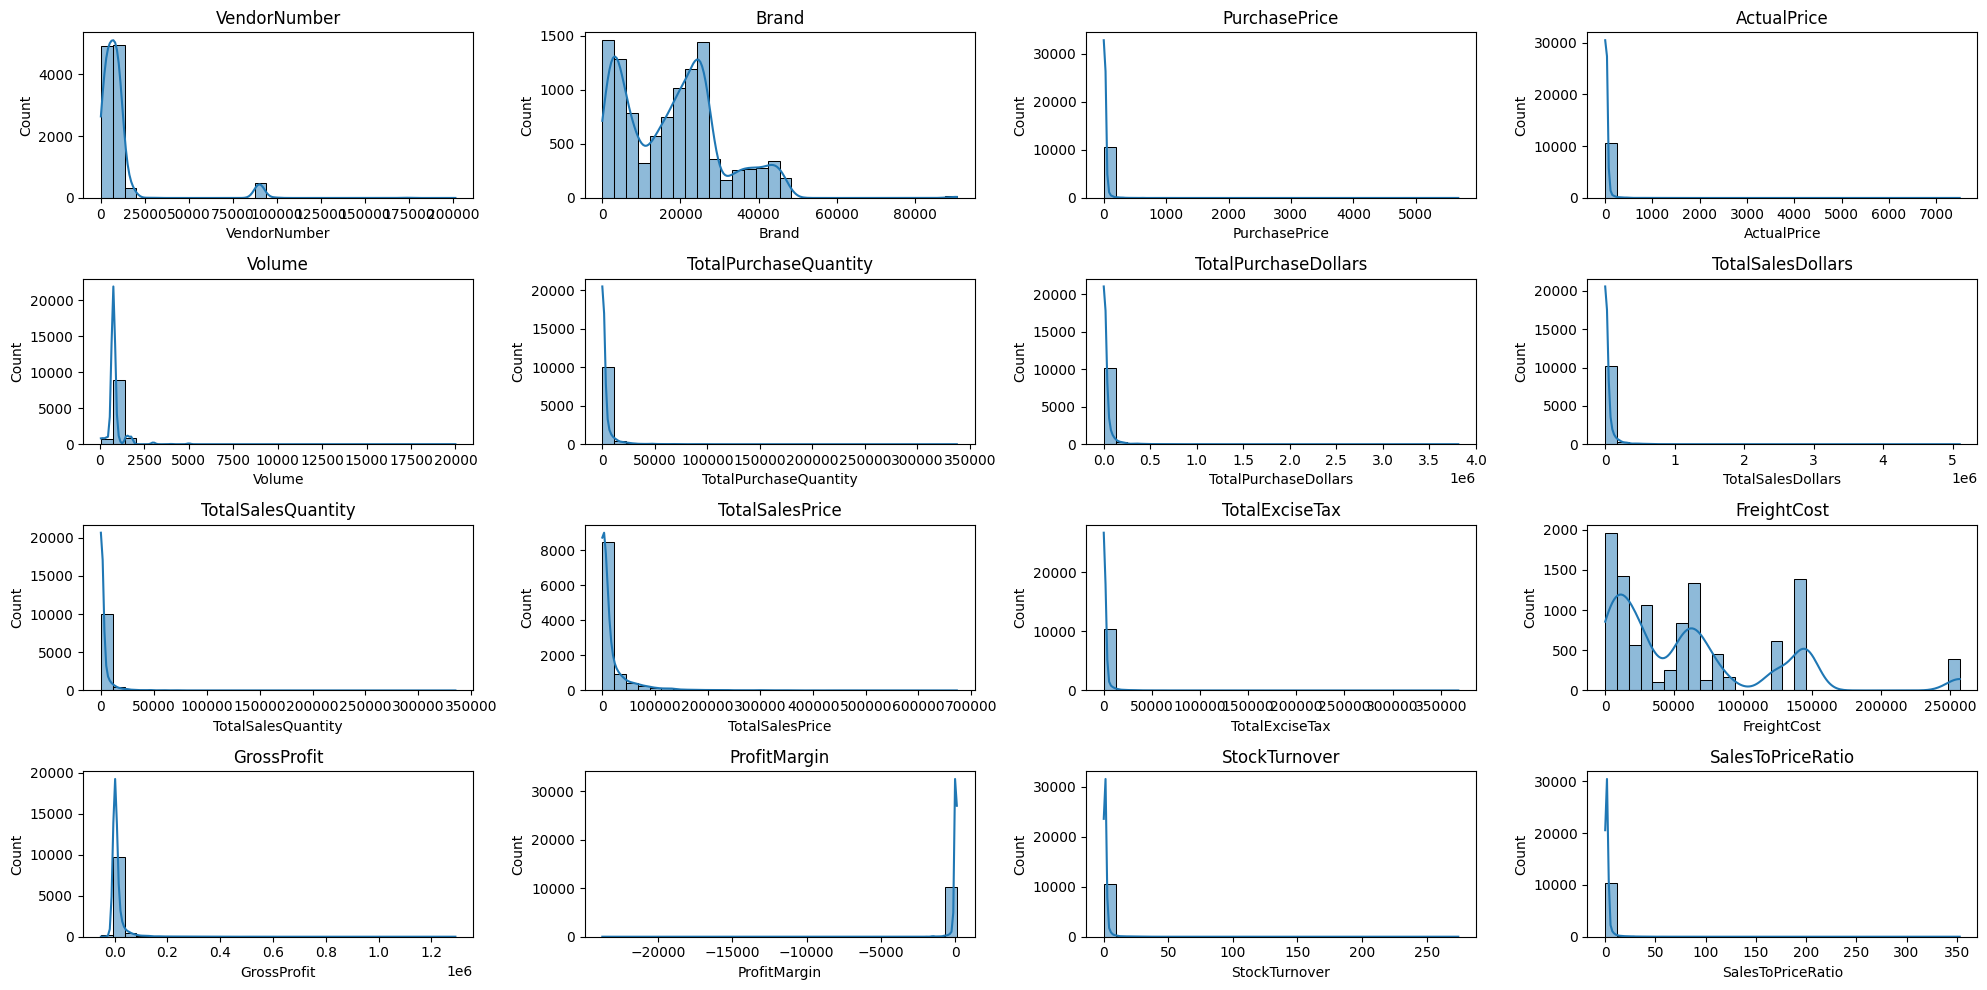

In [90]:
numerical_fields = df.select_dtypes(include= np.number).columns

plt.figure(figsize= (20, 10))

for i, field in enumerate(numerical_fields):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[field], kde= True, bins= 30)
    plt.title(field)

plt.tight_layout()
plt.show()

#### Box plot for identifying outliers

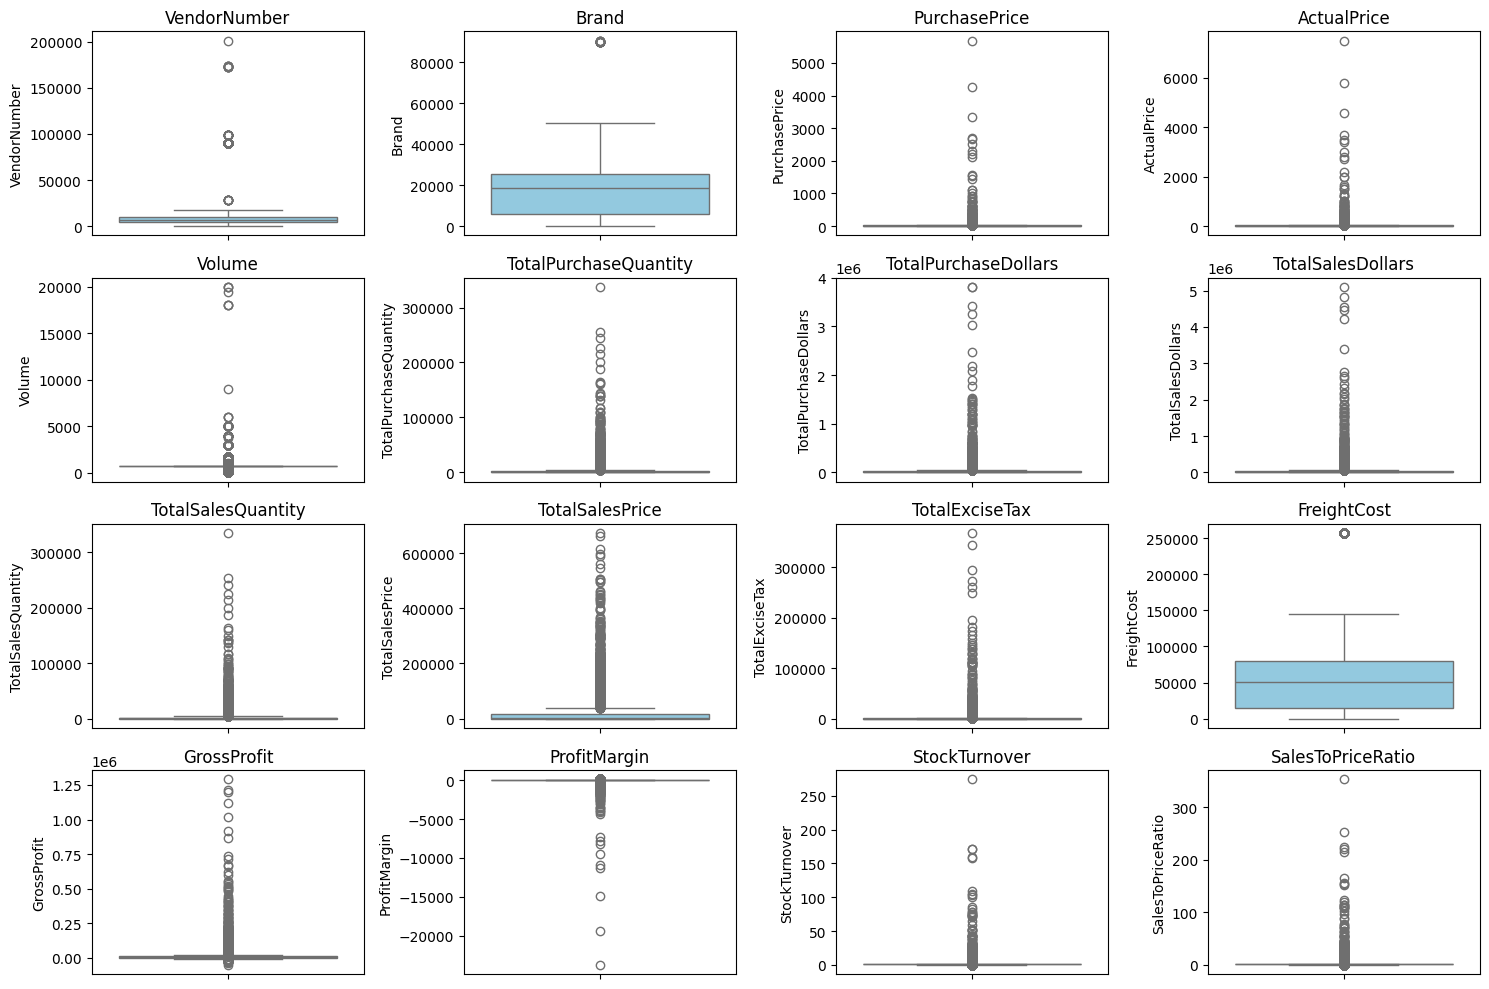

In [91]:
plt.figure(figsize= (15, 10))

for i, field in enumerate(numerical_fields):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y= df[field], color= "skyblue")
    plt.title(field)

plt.tight_layout()
plt.show()

## Summary Statistics Insights

### Zero & Negative Values:
- The Gross Profit shows its lowest point at -52,002.78 which indicates business losses occur. The business operates at a loss because it sells products at prices that are lower than their purchase costs.

- The Profit Margin reaches its lowest point at negative infinity because there exist situations where revenue equals zero or exceeds costs.

- The minimum values of Total Sales Quantity and Sales Dollars reach zero which shows that certain products were bought but remained unsold. The inventory consists of products that do not sell well and products that have become outdated.

### Outliers:
- The maximum values of Purchase & Actual Prices at 5,681.81 and 7,499.99 exceed their corresponding means of 24.39 and 35.64 which points to expensive premium products.

- The wide range of freight costs from 0.09 to 257,032.07 indicates poor logistics management and possibly large volume deliveries.

- Stock Turnover shows a wide range from 0 to 274.5 which indicates that some products have quick sales while others stay in inventory for extended periods. A value above 1 in this metric shows that product sales exceed initial stock purchases because older inventory supplies the fulfilled orders.

## Removing inconsistencies

In [92]:
df= pd.read_sql_query("""
SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0 AND ProfitMargin > 0 AND TotalSalesQuantity > 0
""", database)

In [93]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesDollars,TotalSalesQuantity,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPriceRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,5.101920e+06,142049.0,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,4.819073e+06,160247.0,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,4.538121e+06,187140.0,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,4.475973e+06,200412.0,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,4.223108e+06,135838.0,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8560,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,1.595000e+01,5.0,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8561,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,6.566000e+01,134.0,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8562,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,1.980000e+00,2.0,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8563,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,1.432800e+02,72.0,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


### Count plot for Categorical Fields

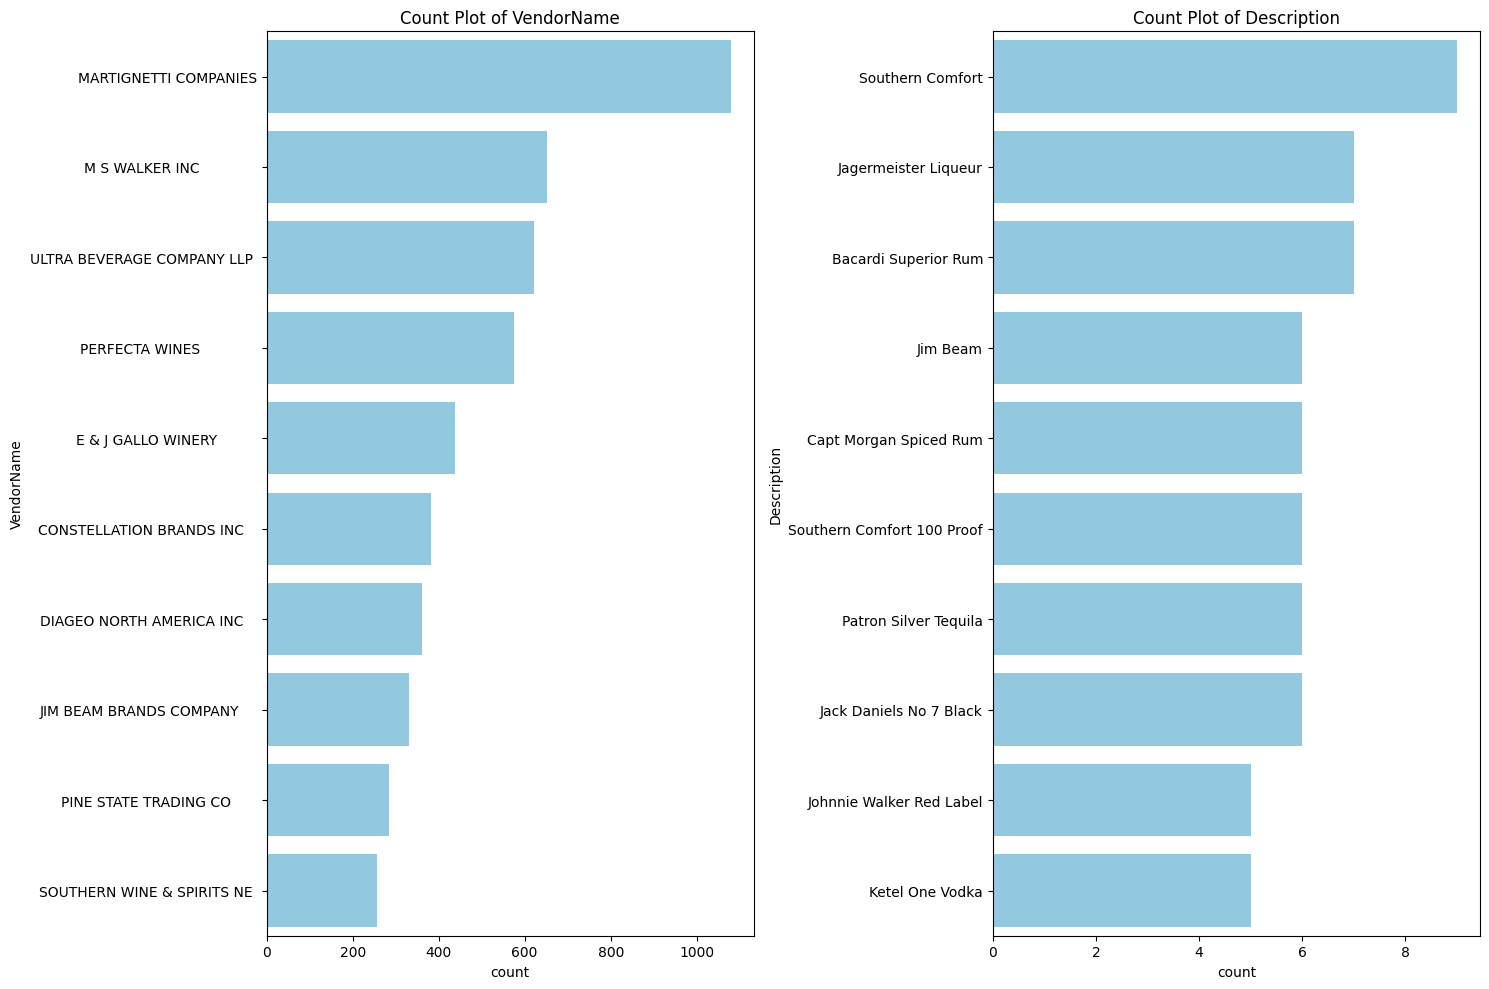

In [94]:
categorical_fields = ["VendorName", "Description"]

plt.figure(figsize= (15, 10))

for i, field in enumerate(categorical_fields):
    plt.subplot(1, 2, i+1)
    sns.countplot(y= df[field], order= df[field].value_counts().index[:10], color= "skyblue")
    plt.title(f"Count Plot of {field}")

plt.tight_layout()
plt.show()

### Heatmap for identifying correlation between numerical fields

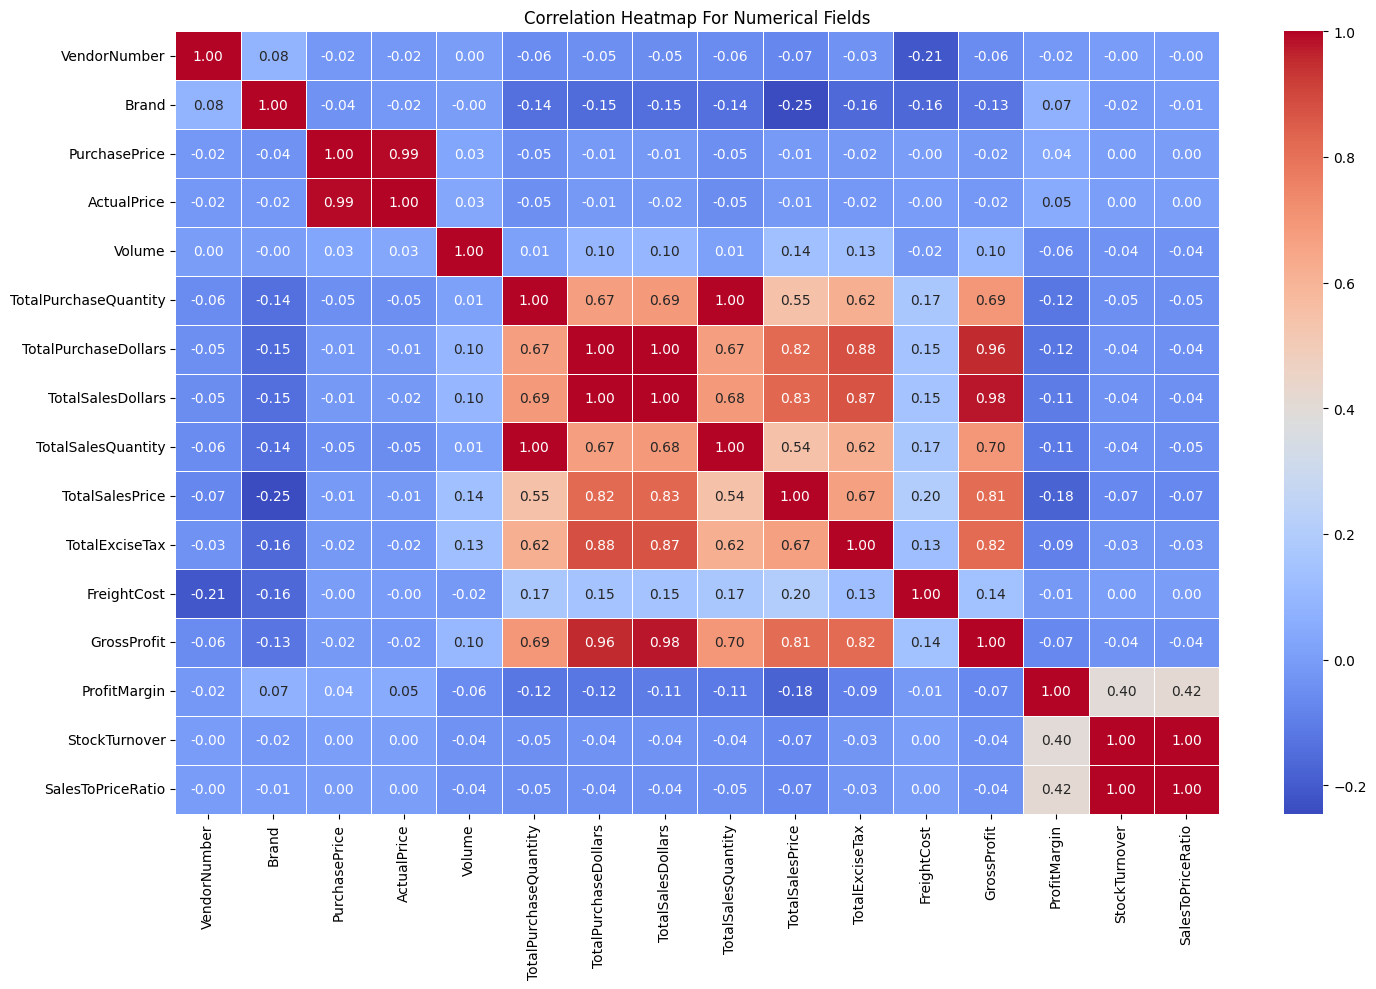

In [95]:
plt.figure(figsize= (15, 10))

corr_matrix= df[numerical_fields].corr()

sns.heatmap(corr_matrix, annot= True, fmt= ".2f", cmap= "coolwarm", linewidths= 0.5)
plt.title("Correlation Heatmap For Numerical Fields")

plt.tight_layout()
plt.show()

## Correlation Insights

- Strong correlation between TotalPurchaseQuantity and TotalSalesQuantity (1.00), confirms efficient inventory turnovers
- PurchasePrice has weak correlation to TotalSalesDollars (-0.01) and GrossProfit(-0.02), suggesting price variation do not significantly impact revenue or profit
- Negative correlation between ProfitMargin and TotalSalesPrice (-0.18) suggests that margin decreases as sales price increases possibly due to competitive pricing pressure
- StockTurnover has negative correlations with GrossProfit(-0.04) indicating that faster turnover does not necessarily result in higher profitability

## Data Analysis

### Identifying brands that need promotional or pricing adjustments which exhibit lower sales performance but higher profit margins

In [98]:
brand_performance= df.groupby("Description").agg(
    {
        "TotalSalesDollars": "sum",
        "ProfitMargin": "mean"
    }
).reset_index()

In [99]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [100]:
low_sales_threshold= brand_performance["TotalSalesDollars"].quantile(0.15)

In [103]:
low_sales_threshold

np.float64(560.299)

In [102]:
high_margin_threshold = brand_performance["ProfitMargin"].quantile(0.85)

In [104]:
high_margin_threshold

np.float64(64.97017552750111)

#### Brands with high profit margins and low sales

In [106]:
target_brands= brand_performance[
    (brand_performance["TotalSalesDollars"] <= low_sales_threshold) &
    (brand_performance["ProfitMargin"] >= high_margin_threshold)
]

In [108]:
display(target_brands.sort_values("TotalSalesDollars"))

,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


#### Scatterplot for identifying target brands for promotional or price adjustments

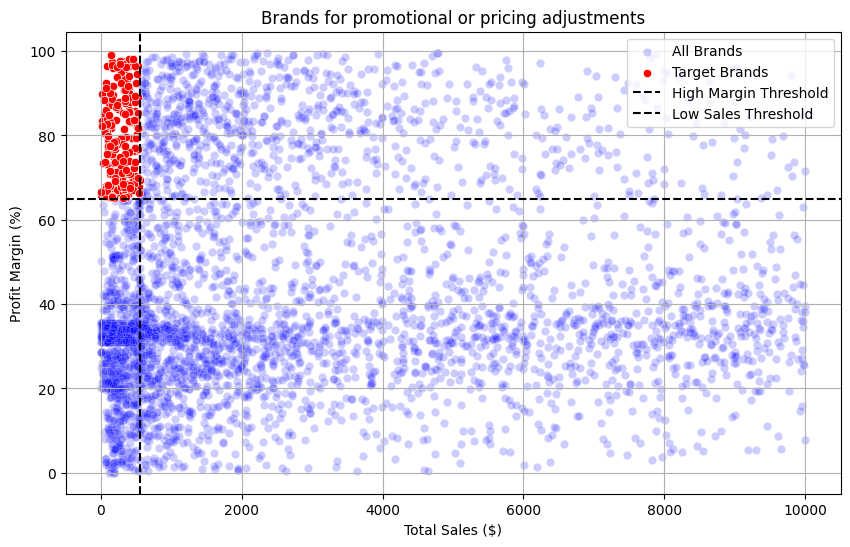

In [112]:
brand_performance= brand_performance[brand_performance["TotalSalesDollars"] < 10000]

plt.figure(figsize= (10, 6))
sns.scatterplot(data= brand_performance, x= "TotalSalesDollars", y= "ProfitMargin", color= "blue", label= "All Brands", alpha= 0.2)
sns.scatterplot(data= target_brands, x= "TotalSalesDollars", y= "ProfitMargin", color= "red", label= "Target Brands")

plt.axhline(high_margin_threshold, linestyle= "--", color= "black", label= "High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle= "--", color= "black", label= "Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for promotional or pricing adjustments")
plt.legend()
plt.grid(True)
plt.show()

#### Vendors and Brands that demonstrate highest sales performance

In [118]:
# Formats dollar values

def transform_dollar(value):
    if value >= 1_000_000:
        return (f"{value/1_000_000:.2f}M")
    elif value >= 1_000:
        return (f"{value/1_000:.2f}K")
    else:
        return str(value)

In [114]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)

In [121]:
top_vendors.apply(lambda x:transform_dollar(x))

VendorName
DIAGEO NORTH AMERICA INC       67.99M
MARTIGNETTI COMPANIES          39.28M
PERNOD RICARD USA              32.06M
JIM BEAM BRANDS COMPANY        31.42M
BACARDI USA INC                24.85M
CONSTELLATION BRANDS INC       24.22M
E & J GALLO WINERY             18.40M
BROWN-FORMAN CORP              18.25M
ULTRA BEVERAGE COMPANY LLP     16.50M
M S WALKER INC                 14.71M
Name: TotalSalesDollars, dtype: object

In [116]:
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [122]:
top_brands.apply(lambda x:transform_dollar(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

#### Visualizing Top Vendors and Top Brands

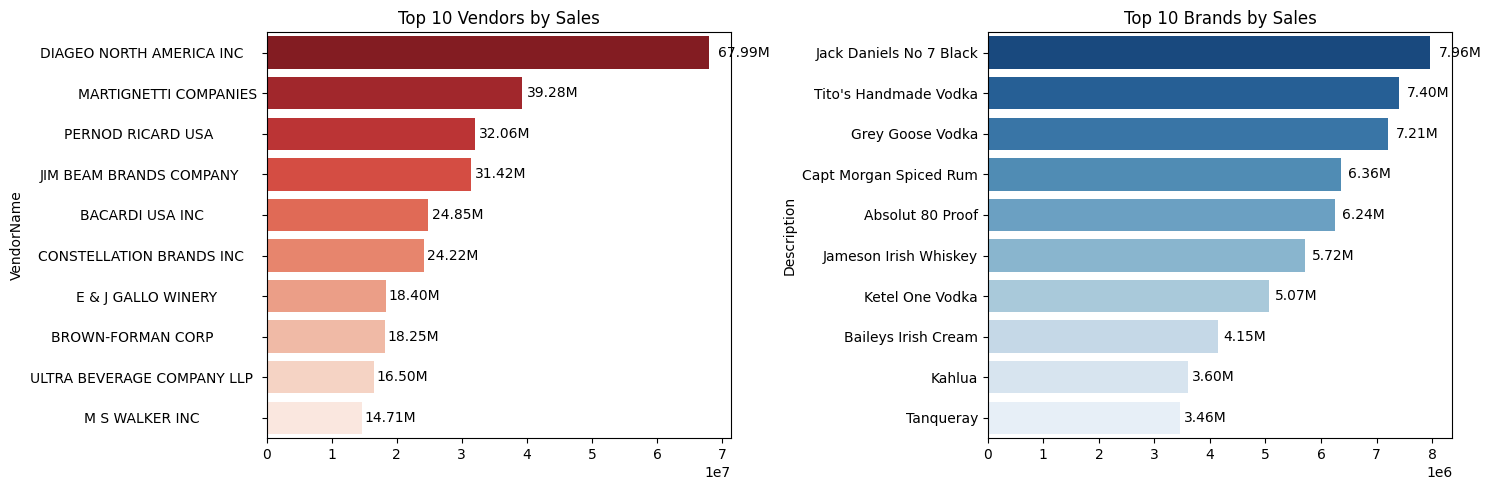

In [132]:
plt.figure(figsize= (15, 5))

# Top Vendors
plt.subplot(1, 2, 1)
ax1= sns.barplot(y= top_vendors.index, x= top_vendors.values, palette= "Reds_r")
plt.title("Top 10 Vendors by Sales")
for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height() / 2,
            transform_dollar(bar.get_width()),
            ha= "left", va= "center", fontsize= 10, color= "black")

# Top Brands
plt.subplot(1, 2, 2)
ax2= sns.barplot(y= top_brands.index.astype(str), x= top_brands.values, palette= "Blues_r")
plt.title("Top 10 Brands by Sales")
for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
            bar.get_y() + bar.get_height() / 2,
            transform_dollar(bar.get_width()),
            ha= "left", va= "center", fontsize= 10, color= "black")

plt.tight_layout()
plt.show()

#### Vendors that contribute the most to total purchase dollars

In [138]:
most_totalpurchasedollars_by_vendors = df.groupby("VendorName").agg({
    "TotalPurchaseDollars": "sum",
    "GrossProfit": "sum",
    "TotalSalesDollars": "sum"
}).reset_index()

In [139]:
most_totalpurchasedollars_by_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53
...,...,...,...,...
115,WEIN BAUER INC,42694.64,13522.49,56217.13
116,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83
117,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20
118,WINE GROUP INC,5203801.17,3100242.11,8304043.28


#### Contribution percentage of Vendors

In [143]:
most_totalpurchasedollars_by_vendors["PurchaseContribution%"] = most_totalpurchasedollars_by_vendors["TotalPurchaseDollars"] / most_totalpurchasedollars_by_vendors["TotalPurchaseDollars"].sum()

In [149]:
most_totalpurchasedollars_by_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
0,ADAMBA IMPORTS INTL INC,446.16,258.37,704.53,0.000001
1,ALISA CARR BEVERAGES,25698.12,78772.82,104470.94,0.000084
2,ALTAMAR BRANDS LLC,11706.20,4000.61,15706.81,0.000038
3,AMERICAN SPIRITS EXCHANGE,934.08,577.08,1511.16,0.000003
4,AMERICAN VINTAGE BEVERAGE,104435.68,35167.85,139603.53,0.000340
...,...,...,...,...,...
115,WEIN BAUER INC,42694.64,13522.49,56217.13,0.000139
116,WESTERN SPIRITS BEVERAGE CO,298416.86,106837.97,405254.83,0.000971
117,WILLIAM GRANT & SONS INC,5876538.26,1693337.94,7569876.20,0.019121
118,WINE GROUP INC,5203801.17,3100242.11,8304043.28,0.016932


In [160]:
most_totalpurchasedollars_by_vendors = round(most_totalpurchasedollars_by_vendors.sort_values("PurchaseContribution%", ascending= False), 2)

#### Top 10 Vendors that contribute the most to total purchase dollars

In [161]:
top_ten_vendors = round(most_totalpurchasedollars_by_vendors.head(10), 2)
top_ten_vendors["TotalSalesDollars"] = top_ten_vendors["TotalSalesDollars"].apply(transform_dollar)
top_ten_vendors["TotalPurchaseDollars"] = top_ten_vendors["TotalPurchaseDollars"].apply(transform_dollar)
top_ten_vendors["GrossProfit"] = top_ten_vendors["GrossProfit"].apply(transform_dollar)

In [162]:
top_ten_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,0.16
57,MARTIGNETTI COMPANIES,25.46M,13.81M,39.28M,0.08
69,PERNOD RICARD USA,23.85M,8.21M,32.06M,0.08
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,0.08
6,BACARDI USA INC,17.43M,7.42M,24.85M,0.06
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,0.05
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,0.04
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,0.04
107,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,0.04
53,M S WALKER INC,9.76M,4.94M,14.71M,0.03
